In [1]:
#%pdb
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import operator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load the data
train_data = pd.read_csv('data/data_regression.csv', header=None)

X = train_data.iloc[:, :6] #could also use [:,:-1]
y = train_data.iloc[:,6] #could also use [:,-1]

In [3]:
# Standardization scaling object
scaler = StandardScaler()

# Fit the standardization parameters and scale the data
X = scaler.fit_transform(X)

#print(train_data)
#print(X.head(6))
#print(y.head(6))

In [4]:
# Check coefficients without regularization

linear_reg = LinearRegression()
linear_reg.fit(X,y)
linear_reg_coef = linear_reg.coef_
print(linear_reg_coef)

[ -0.03429525   5.12341093   9.8249303   -0.63866951 -12.53990789
   1.69699858]


In [5]:
# Create the linear regression model with lasso regularization (l1)
lasso_reg = Lasso(alpha=1)
# alpha = 0 equals linear regression without regularitzation
# the bigger the alpha the more penalitzation on the complexity of the model, so  the complexity gets reduced
# with bigger alpha (more zeroed coef)

# Fit the model.
lasso_reg.fit(X,y)

# Retrieve and print out the coefficients from the regression model
reg_coef = lasso_reg.coef_
print(reg_coef)

# Note that Lasso regularization has set the coefficients to 0

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


In [6]:
# Create the linear regression model with ridge regularization (l2)
ridge_reg = Ridge(alpha=1)
# alpha = 0 equals linear regression without regularitzation
# the bigger the alpha the more penalitzation on the complexity of the model, so  the complexity gets reduced
# with bigger alpha (more zeroed coef)

# Fit the model.
ridge_reg.fit(X,y)

# Retrieve and print out the coefficients from the regression model
ridge_reg_coef = ridge_reg.coef_
print(ridge_reg_coef)

# Note that Ridge regularization sets some very small coefficients but non-zero

[ -0.02973229   5.09016709   9.71683689  -0.65805793 -12.41103002
   1.69306874]


[[ 1.00000000e+00 -3.35320000e-01  1.12439502e-01 -3.77032139e-02
   1.26426417e-02]
 [ 1.00000000e+00  2.16000000e-02  4.66560000e-04  1.00776960e-05
   2.17678234e-07]
 [ 1.00000000e+00 -1.19438000e+00  1.42654358e+00 -1.70383513e+00
   2.03502660e+00]
 [ 1.00000000e+00 -6.50460000e-01  4.23098212e-01 -2.75208463e-01
   1.79012097e-01]
 [ 1.00000000e+00 -2.80010000e-01  7.84056001e-02 -2.19543521e-02
   6.14743813e-03]
 [ 1.00000000e+00  1.93258000e+00  3.73486546e+00  7.21792628e+00
   1.39492200e+01]
 [ 1.00000000e+00  1.22620000e+00  1.50356644e+00  1.84367317e+00
   2.26071204e+00]
 [ 1.00000000e+00  7.47270000e-01  5.58412453e-01  4.17284874e-01
   3.11824468e-01]
 [ 1.00000000e+00  3.32853000e+00  1.10791120e+01  3.68771565e+01
   1.22746722e+02]
 [ 1.00000000e+00  2.87457000e+00  8.26315268e+00  2.37530108e+01
   6.82796923e+01]
 [ 1.00000000e+00 -1.48662000e+00  2.21003902e+00 -3.28548821e+00
   4.88427249e+00]
 [ 1.00000000e+00  3.76290000e-01  1.41594164e-01  5.32804680e-02

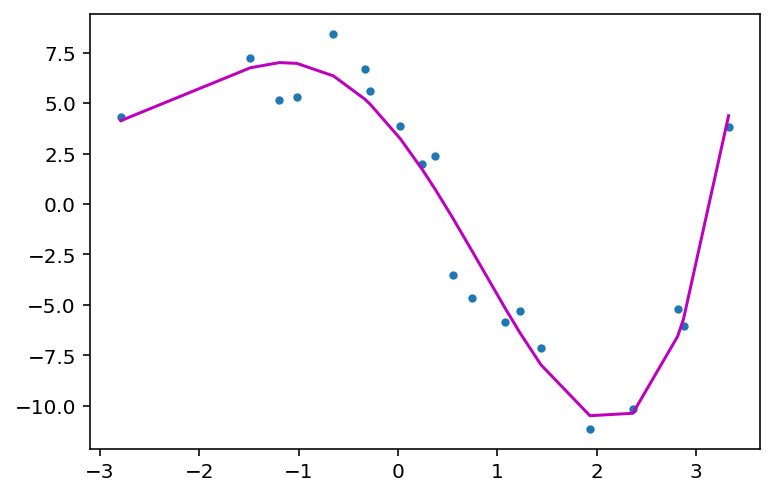

In [7]:
train_data = pd.read_csv('data/data_regression_poly.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

# Create a PolynomialFeatures object, then fit and transform the predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)
print(X_poly)

# Create a LinearRegression object and fit it to the polynomial predictor features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

# Predicting a new result with Polymonial Regression
poly_model.predict(poly_feat.fit_transform([[0.5]]))

# Plot results
plt.scatter(X, y, s=10)
# plt.plot(X, poly_model.predict(poly_feat.fit_transform(X)), color='red')

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')

plt.show()